# Data exploration

1. Load the protein data

In [1]:
from biopandas.pdb import PandasPdb
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from scipy.stats import pearsonr, spearmanr
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import random
random.seed(42)
np.random.seed(42)

In [3]:
opened_protein = PandasPdb().read_pdb("../workshop_data/proteins/6loo.pdb")

In [ ]:
opened_protein.df["ATOM"].head(5)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,2,,...,-5.386,7.785,-24.021,1.0,48.67,,,N,NaN,1
1,ATOM,2,,CA,,LYS,,A,2,,...,-3.910,7.759,-23.723,1.0,51.93,,,C,NaN,2
2,ATOM,3,,C,,LYS,,A,2,,...,-3.643,7.141,-22.341,1.0,49.31,,,C,NaN,3
3,ATOM,4,,O,,LYS,,A,2,,...,-4.431,7.374,-21.398,1.0,46.09,,,O,NaN,4
4,ATOM,5,,CB,,LYS,,A,2,,...,-3.294,9.160,-23.787,1.0,52.96,,,C,NaN,5


In [5]:
opened_protein.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,LYS,,A,2,,...,-5.386,7.785,-24.021,1.0,48.67,,,N,NaN,1
1,ATOM,2,,CA,,LYS,,A,2,,...,-3.910,7.759,-23.723,1.0,51.93,,,C,NaN,2
2,ATOM,3,,C,,LYS,,A,2,,...,-3.643,7.141,-22.341,1.0,49.31,,,C,NaN,3
3,ATOM,4,,O,,LYS,,A,2,,...,-4.431,7.374,-21.398,1.0,46.09,,,O,NaN,4
4,ATOM,5,,CB,,LYS,,A,2,,...,-3.294,9.160,-23.787,1.0,52.96,,,C,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2959,ATOM,2960,,CD,,ARG,,A,348,,...,0.425,-6.145,11.116,1.0,78.80,,,C,NaN,2960
2960,ATOM,2961,,NE,,ARG,,A,348,,...,-0.763,-5.306,11.040,1.0,82.36,,,N,NaN,2961
2961,ATOM,2962,,CZ,,ARG,,A,348,,...,-1.795,-5.350,11.880,1.0,86.54,,,C,NaN,2962
2962,ATOM,2963,,NH1,,ARG,,A,348,,...,-2.824,-4.540,11.695,1.0,87.19,,,N,NaN,2963


2. Plot the distribution of amino acids.

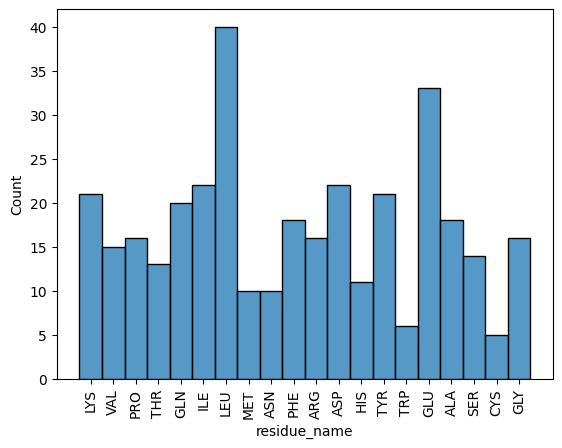

In [6]:
grouped_amino_acids = opened_protein.df["ATOM"].groupby("residue_number").first()
sns.histplot(grouped_amino_acids["residue_name"])
# Rotate the x-axis labels
plt.xticks(rotation=90)
plt.show()


3. Extract the sequence from the protein file and write it into a fasta file

In [7]:
aa_dict = {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E', 'PHE': 'F',
    'GLY': 'G', 'HIS': 'H', 'ILE': 'I', 'LYS': 'K', 'LEU': 'L',
    'MET': 'M', 'ASN': 'N', 'PRO': 'P', 'GLN': 'Q', 'ARG': 'R',
    'SER': 'S', 'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
}

# Convert 3-letter amino acids to sequence
sequence = "".join(grouped_amino_acids["residue_name"].map(aa_dict))
print("Protein sequence:")
fasta_location = "../workshop_data/proteins/6loo.fasta"
with open(fasta_location, "w") as f:
    f.write(f">6loo\n{sequence}")


Protein sequence:


3. Load the ligands data

In [ ]:
loaded_ligands = pd.read_csv("../workshop_data/ligands/tpcn_molecules.csv", header = 0)
print(loaded_ligands.head(5))

  TerpenoidsID Molecular Formula  Molecular Weight  \
0    TPCN00001         C34H50O20           778.754   
1    TPCN00002       C44H56N2O20           932.926   
2    TPCN00003         C25H30O11           506.504   
3    TPCN00004         C44H64O23           960.973   
4    TPCN00005          C15H20O3           248.322   

                                              Smiles  
0  C=CC1C(OC2OC(CO)C(O)C(O)C2O)OC=C(C(=O)OC2CC3C(...  
1  C=CC1C(OC2OC(CO)C(O)C(O)C2O)OC=C(C(=O)OC2CC3C(...  
2  CC(C)=CC1OC(=O)C(=CCOC2OC(COC(=O)C=Cc3ccc(O)cc...  
3  CC=C1C(OC2OC(CO)C(O)C(O)C2O)OC=C(C(=O)OC)C1CC(...  
4               CC=C(C)C(=O)OC12CC(C(=O)C=C1C)C2(C)C  


4. Plot the Molecular Weight distribution

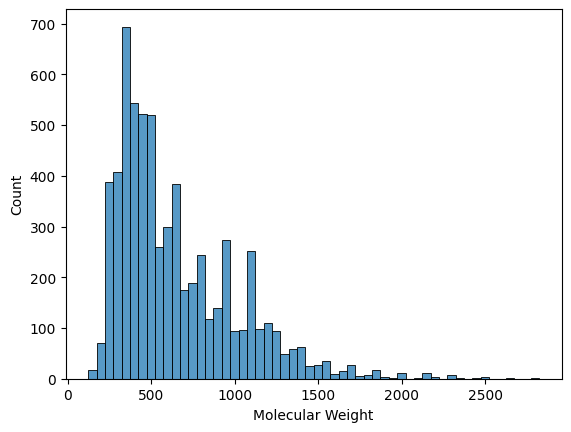

In [9]:
sns.histplot(loaded_ligands["Molecular Weight"])
plt.show()

# Feature extraction

In [10]:
import iFeatureOmegaCLI
protein_features = iFeatureOmegaCLI.iProtein(fasta_location)


In [11]:
help(protein_features)

Help on iProtein in module iFeatureOmegaCLI.iFeatureOmegaCLI object:

class iProtein(Sequence)
 |  iProtein(file)
 |  
 |  # Running examples:
 |  # import iFeatureOmegaCLI
 |  >>> import iFeatureOmegaCLI
 |  
 |  # create a instance
 |  >>> protein = iFeatureOmegaCLI.iProtein("./data_examples/peptide_sequences.txt")
 |  
 |  # display available feature descriptor methods
 |  >>> protein.display_feature_types()
 |  
 |  # import parameters for feature descriptors (optimal)
 |  >>> protein.import_parameters('parameters/Protein_parameters_setting.json')
 |  
 |  # calculate feature descriptors. Take "AAC" as an example.
 |  >>> protein.get_descriptor("AAC")
 |  
 |  # display the feature descriptors
 |  >>> print(protein.encodings)
 |  
 |  # save feature descriptors
 |  >>> protein.to_csv("AAC.csv", "index=False", header=False)
 |  
 |  Method resolution order:
 |      iProtein
 |      Sequence
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  CalculateContent(self, myDist

In [12]:
protein_features.display_feature_types()


        ----- Available feature types ------        
        
        AAC                                                Amino acid composition
        EAAC                                               Enhanced amino acid composition
        CKSAAP type 1                                      Composition of k-spaced amino acid pairs type 1 - normalized
        CKSAAP type 2                                      Composition of k-spaced amino acid pairs type 2 - raw count
        DPC type 1                                         Dipeptide composition type 1 - normalized
        DPC type 2                                         Dipeptide composition type 2 - raw count
        TPC type 1                                         Tripeptide composition type 1 - normalized
        TPC type 2                                         Tripeptide composition type 1 - raw count
        CTDC                                               Composition
        CTDT                                      

In [13]:
descriptor_blocks = ["AAC", "DistancePair", "BLOSUM62"]
protein_features = []
package_protein_features = iFeatureOmegaCLI.iProtein(fasta_location)
protein_features_names = []
for current_descriptor_block in descriptor_blocks:
    package_protein_features.get_descriptor(current_descriptor_block)
    current_features_table = package_protein_features.encodings.reset_index(drop=True)
    protein_features += current_features_table.values[0].tolist()
    protein_features_names += current_features_table.columns.tolist()

## Small molecules

In [14]:
from collections import Counter
possible_atoms = ["C", "N", "O", "S", "P"]
for current_atom in possible_atoms:
    loaded_ligands[current_atom + "_number"] = loaded_ligands["Smiles"].apply(lambda x: Counter(x)[current_atom])


In [15]:
labels = pd.read_csv("../workshop_data/ligands/tcpn_energy.csv", header = 0, sep = ",")
labels = labels.dropna(subset = ["binding_affinity"])

In [16]:
labels

,ligand_id,binding_affinity
0,TPCN06011,-16.560
1,TPCN04891,-14.000
2,TPCN03862,-10.890
3,TPCN04809,-10.800
4,TPCN05951,-10.270
...,...,...
94,TPCN01298,-6.760
95,TPCN03419,-6.646
96,TPCN01154,-6.465
97,TPCN02272,-6.025


In [17]:
loaded_ligands

,TerpenoidsID,Molecular Formula,Molecular Weight,Smiles,C_number,N_number,O_number,S_number,P_number
0,TPCN00001,C34H50O20,778.754,C=CC1C(OC2OC(CO)C(O)C(O)C2O)OC=C(C(=O)OC2CC3C(...,34,0,20,0,0
1,TPCN00002,C44H56N2O20,932.926,C=CC1C(OC2OC(CO)C(O)C(O)C2O)OC=C(C(=O)OC2CC3C(...,36,1,20,0,0
2,TPCN00003,C25H30O11,506.504,CC(C)=CC1OC(=O)C(=CCOC2OC(COC(=O)C=Cc3ccc(O)cc...,19,0,11,0,0
3,TPCN00004,C44H64O23,960.973,CC=C1C(OC2OC(CO)C(O)C(O)C2O)OC=C(C(=O)OC)C1CC(...,44,0,23,0,0
4,TPCN00005,C15H20O3,248.322,CC=C(C)C(=O)OC12CC(C(=O)C=C1C)C2(C)C,15,0,3,0,0
...,...,...,...,...,...,...,...,...,...
6378,TPCN06379,C30H44O5,484.677,C=C1CCC23CCC4(C)C5(C)CCC6C(C)(CO)C(O)CCC6(C)C5...,30,0,5,0,0
6379,TPCN06380,C30H40O5,480.645,CC1=CCC(C(C)C2CCC3(C)C4=C(CCC23C)C2OC23C=CC(=O...,30,0,5,0,0
6380,TPCN06381,C32H42O6,522.682,CC(=O)OC1CC2(C)C(C(C)C3CC=C(C)C(=O)O3)CCC2(C)C...,32,0,6,0,0
6381,TPCN06382,C30H38O5,478.629,CC1=CCC(C(C)C2CCC3(C)C4=C(C=C5C=CC(=O)OC(C)(C)...,30,0,5,0,0


In [18]:
from mordred import Calculator, descriptors
from rdkit import Chem

subset_ligands = pd.merge(labels, loaded_ligands, left_on = "ligand_id", right_on = "TerpenoidsID", how = "left")

In [19]:
calc = Calculator(descriptors, ignore_3D=True)
rdkit_mol_list = [Chem.MolFromSmiles(smiles) for smiles in subset_ligands["Smiles"]]
mordred_features = calc.pandas(rdkit_mol_list)


100%|██████████| 99/99 [00:29<00:00,  3.35it/s]


In [20]:
# Drop features that cannot be converted to float
mordred_features = mordred_features.apply(pd.to_numeric, errors="coerce")
mordred_features = mordred_features.dropna(how = "all", axis = 1)
mordred_features_names = mordred_features.columns.tolist()
mordred_features["ligand_id"] = subset_ligands["TerpenoidsID"]
mordred_features.to_csv("../workshop_data/ligands/mordred_features.csv", index = False)
mordred_features.head(5)

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,ligand_id
0,1,0,116.907893,2.710020,5.420041,116.907893,1.270738,5.469856,5.190597,0.056420,...,134.493753,1322.650677,6.817787,47759,203,530.0,664.0,36.041667,19.298611,TPCN06011
1,0,0,135.158789,2.749071,5.498142,135.158789,1.275083,5.599604,5.532670,0.052195,...,149.045598,1514.692936,7.012467,71019,233,594.0,744.0,41.986111,22.993056,TPCN04891
2,1,0,78.422514,2.711902,5.423804,78.422514,1.264879,5.083705,5.193665,0.083769,...,102.771735,882.497686,6.488954,17476,142,364.0,461.0,24.486111,12.868056,TPCN03862
3,0,0,107.062484,2.711689,5.423378,107.062484,1.274553,5.378940,5.186106,0.061739,...,126.072828,1206.603333,6.778670,45559,187,484.0,608.0,33.097222,17.673611,TPCN04809
4,0,0,140.462165,2.718010,5.436017,140.462165,1.265425,5.640165,5.442011,0.049027,...,168.285509,1592.833787,6.664577,94194,225,612.0,751.0,42.104167,23.951389,TPCN05951


## Grab labels

In [ ]:
drugs_with_labels = pd.merge(mordred_features, labels, on = "ligand_id", how = "right")
drugs_with_labels.head(5)

,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,ligand_id,binding_affinity
0,1,0,116.907893,2.710020,5.420041,116.907893,1.270738,5.469856,5.190597,0.056420,...,1322.650677,6.817787,47759,203,530.0,664.0,36.041667,19.298611,TPCN06011,-16.56
1,0,0,135.158789,2.749071,5.498142,135.158789,1.275083,5.599604,5.532670,0.052195,...,1514.692936,7.012467,71019,233,594.0,744.0,41.986111,22.993056,TPCN04891,-14.00
2,1,0,78.422514,2.711902,5.423804,78.422514,1.264879,5.083705,5.193665,0.083769,...,882.497686,6.488954,17476,142,364.0,461.0,24.486111,12.868056,TPCN03862,-10.89
3,0,0,107.062484,2.711689,5.423378,107.062484,1.274553,5.378940,5.186106,0.061739,...,1206.603333,6.778670,45559,187,484.0,608.0,33.097222,17.673611,TPCN04809,-10.80
4,0,0,140.462165,2.718010,5.436017,140.462165,1.265425,5.640165,5.442011,0.049027,...,1592.833787,6.664577,94194,225,612.0,751.0,42.104167,23.951389,TPCN05951,-10.27


In [ ]:
# Repeat the protein features on labelled ligands
protein_features_df = pd.DataFrame(np.repeat([protein_features], drugs_with_labels.shape[0], axis = 0), columns = protein_features_names)
data_for_ML = pd.concat([drugs_with_labels.reset_index(drop = True), protein_features_df.reset_index(drop = True)], axis = 1)
data_for_ML.head(5)


,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,blosum62_6931,blosum62_6932,blosum62_6933,blosum62_6934,blosum62_6935,blosum62_6936,blosum62_6937,blosum62_6938,blosum62_6939,blosum62_6940
0,1,0,116.907893,2.710020,5.420041,116.907893,1.270738,5.469856,5.190597,0.056420,...,-2.0,2.0,-1.0,-3.0,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0
1,0,0,135.158789,2.749071,5.498142,135.158789,1.275083,5.599604,5.532670,0.052195,...,-2.0,2.0,-1.0,-3.0,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0
2,1,0,78.422514,2.711902,5.423804,78.422514,1.264879,5.083705,5.193665,0.083769,...,-2.0,2.0,-1.0,-3.0,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0
3,0,0,107.062484,2.711689,5.423378,107.062484,1.274553,5.378940,5.186106,0.061739,...,-2.0,2.0,-1.0,-3.0,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0
4,0,0,140.462165,2.718010,5.436017,140.462165,1.265425,5.640165,5.442011,0.049027,...,-2.0,2.0,-1.0,-3.0,-2.0,-1.0,-1.0,-3.0,-2.0,-3.0


## ML

In [23]:
data_for_ML.to_csv("../workshop_data/data_for_ML.csv", index = False)

In [24]:
features_names = protein_features_names + mordred_features_names

In [ ]:
# Drop features with variance 0
print(f"Before dropping features with variance 0: {data_for_ML[features_names].shape[1]} features")
# Write a row with the variance of each feature
variance = data_for_ML[features_names].var()
# Drop features with variance 0
features_to_drop = variance[variance == 0].index.tolist()

Before dropping features with variance 0: 8466 features


In [26]:
labels = data_for_ML["binding_affinity"]

In [27]:
# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data_for_ML[features_names].fillna(0), labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

# Initialize the model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
#model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42, verbose = True)
# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
test_predictions = model.predict(test_data)

# Calculate evaluation metrics
mse = mean_squared_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)
mae = median_absolute_error(test_labels, test_predictions)
pearson = pearsonr(test_labels, test_predictions)
spearman = spearmanr(test_labels, test_predictions)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Median Absolute Error: {mae}")
print(f"Pearson Correlation: {pearson[0]}")
print(f"Spearman Correlation: {spearman[0]}")

Mean Squared Error: 3.1742318142799997
R-squared: 0.26746078650642213
Median Absolute Error: 0.4468850000000004
Pearson Correlation: 0.5197004415675587
Spearman Correlation: 0.5398496240601504


## Protein data digestion

In [28]:
opened_protein.df["ATOM"]
# make a df with the x, y and z coordinates as well as the one hot encoded atom name and residue name
protein_coordinates_df = opened_protein.df["ATOM"][["x_coord", "y_coord", "z_coord", "atom_name", "residue_name"]]
protein_coordinates_df = pd.get_dummies(protein_coordinates_df, columns = ["atom_name", "residue_name"]).astype(float)
protein_coordinates_df.to_csv("../workshop_data/protein_coordinates_df.csv", index = False)


In [29]:
# convert protein_coordinates_df to a one dimensional array
protein_coordinates_array = protein_coordinates_df.astype(float).values.flatten()
protein_coordinates_array



array([ -5.386,   7.785, -24.021, ...,   0.   ,   0.   ,   0.   ])

In [30]:
custom_features_names = protein_coordinates_df.columns.tolist() + mordred_features_names

In [31]:
# Repeat the protein features on labelled ligands
protein_features_df = pd.DataFrame(np.repeat([protein_coordinates_array], drugs_with_labels.shape[0], axis = 0), columns = [f"protein_{str(feature)}" for feature in range(1, protein_coordinates_array.shape[0] + 1)])
custom_data_for_ML = pd.concat([drugs_with_labels.reset_index(drop = True), protein_features_df.reset_index(drop = True)], axis = 1)
custom_data_for_ML.head(5)


,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,VE2_A,...,protein_174867,protein_174868,protein_174869,protein_174870,protein_174871,protein_174872,protein_174873,protein_174874,protein_174875,protein_174876
0,1,0,116.907893,2.710020,5.420041,116.907893,1.270738,5.469856,5.190597,0.056420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,135.158789,2.749071,5.498142,135.158789,1.275083,5.599604,5.532670,0.052195,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,78.422514,2.711902,5.423804,78.422514,1.264879,5.083705,5.193665,0.083769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,107.062484,2.711689,5.423378,107.062484,1.274553,5.378940,5.186106,0.061739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,140.462165,2.718010,5.436017,140.462165,1.265425,5.640165,5.442011,0.049027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:


# Split the data into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(custom_data_for_ML.drop(columns = ["ligand_id", "binding_affinity"]).fillna(0), labels, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)
# Initialize the model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
#model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42, verbose = True)
# Train the model
model.fit(train_data, train_labels)

# Make predictions on the test set
test_predictions = model.predict(test_data)

# Calculate evaluation metrics
mse = mean_squared_error(test_labels, test_predictions)
r2 = r2_score(test_labels, test_predictions)
mae = median_absolute_error(test_labels, test_predictions)
pearson = pearsonr(test_labels, test_predictions)
spearman = spearmanr(test_labels, test_predictions)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Median Absolute Error: {mae}")
print(f"Pearson Correlation: {pearson[0]}")
print(f"Spearman Correlation: {spearman[0]}")

Mean Squared Error: 3.3909882128149995
R-squared: 0.21743842802957425
Median Absolute Error: 0.5016549999999969
Pearson Correlation: 0.46886806361038447
Spearman Correlation: 0.5383458646616541


In [33]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader


In [34]:
class ProteinLigandDataset(Dataset):
    def __init__(self, protein_features, drug_features, labels):
        # Reshape protein features to [batch, channels, height, width]
        # Assuming protein_features is [batch, height, width]
        self.protein_features = torch.FloatTensor(protein_features).unsqueeze(1)  # Add channel dimension
        self.drug_features = torch.FloatTensor(drug_features)
        self.labels = torch.FloatTensor(labels)
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return (self.protein_features[idx], self.drug_features[idx], self.labels[idx])

class MultimodalNet(nn.Module):
    def __init__(self, protein_input_shape, drug_input_size):
        super(MultimodalNet, self).__init__()
        
        # Protein feature processing branch (CNN)
        self.protein_network = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool2d((1, 1)),  # Global average pooling
            nn.Flatten()  # Flatten to 128 features
        )
        
        # Drug feature processing branch (MLP)
        self.drug_network = nn.Sequential(
            nn.Linear(drug_input_size, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Combined network
        self.combined_network = nn.Sequential(
            nn.Linear(256, 128),  # 128 + 128 from both branches
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)
        )
    
    def forward(self, protein_x, drug_x):
        protein_features = self.protein_network(protein_x)
        drug_features = self.drug_network(drug_x)
        combined = torch.cat((protein_features, drug_features), dim=1)
        return self.combined_network(combined)

# Training setup
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=100):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    
    best_val_loss = float('inf')
    patience = 10
    patience_counter = 0
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        for protein_batch, drug_batch, labels_batch in train_loader:
            protein_batch = protein_batch.to(device)
            drug_batch = drug_batch.to(device)
            labels_batch = labels_batch.to(device)
            
            optimizer.zero_grad()
            outputs = model(protein_batch, drug_batch)
            loss = criterion(outputs.squeeze(), labels_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            
        # Validation phase
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for protein_batch, drug_batch, labels_batch in val_loader:
                protein_batch = protein_batch.to(device)
                drug_batch = drug_batch.to(device)
                labels_batch = labels_batch.to(device)
                
                outputs = model(protein_batch, drug_batch)
                loss = criterion(outputs.squeeze(), labels_batch)
                val_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {val_loss/len(val_loader):.4f}')
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping at epoch {epoch+1}')
                break

In [35]:
# Create datasets and dataloaders
protein_features = protein_coordinates_df.fillna(0).values

scaled_protein_features = scaler.fit_transform(protein_features)

drug_features = mordred_features.drop(columns=['ligand_id']).fillna(0).values
scaled_drug_features = scaler.fit_transform(drug_features)
# Split the data
X_train_drug, X_test_drug, y_train, y_test = train_test_split(
    scaled_drug_features, labels, test_size=0.2, random_state=42
)

In [ ]:


train_dataset = ProteinLigandDataset([scaled_protein_features]*len(X_train_drug), X_train_drug.astype(float), y_train.values)
test_dataset = ProteinLigandDataset([scaled_protein_features]*len(X_test_drug), X_test_drug.astype(float), y_test.values)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Initialize model, loss function, and optimizer
model = MultimodalNet(protein_input_shape=scaled_protein_features.shape, 
                     drug_input_size=drug_features.shape[1])
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
train_model(model, train_loader, test_loader, criterion, optimizer)



Epoch [1/100], Train Loss: 69.5245, Val Loss: 65.4854
Epoch [2/100], Train Loss: 45.9406, Val Loss: 20.8466
Epoch [3/100], Train Loss: 10.6066, Val Loss: 23.1998
Epoch [4/100], Train Loss: 21.5367, Val Loss: 5.4025
Epoch [5/100], Train Loss: 6.4740, Val Loss: 15.6747
Epoch [6/100], Train Loss: 12.8001, Val Loss: 14.4691
Epoch [7/100], Train Loss: 6.9700, Val Loss: 4.6189
Epoch [8/100], Train Loss: 3.6167, Val Loss: 5.0363
Epoch [9/100], Train Loss: 6.1691, Val Loss: 3.1703
Epoch [10/100], Train Loss: 4.7510, Val Loss: 6.1530
Epoch [11/100], Train Loss: 4.4891, Val Loss: 7.3460
Epoch [12/100], Train Loss: 3.8016, Val Loss: 4.3184
Epoch [13/100], Train Loss: 2.4270, Val Loss: 3.2327
Epoch [14/100], Train Loss: 3.7829, Val Loss: 3.2247
Epoch [15/100], Train Loss: 3.3884, Val Loss: 3.4550
Epoch [16/100], Train Loss: 3.4342, Val Loss: 4.4855
Epoch [17/100], Train Loss: 4.3727, Val Loss: 3.6215
Epoch [18/100], Train Loss: 2.5852, Val Loss: 2.9572
Epoch [19/100], Train Loss: 3.1015, Val Loss:

In [41]:
# Evaluate the model
model.eval()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
predictions = []
actuals = []

with torch.no_grad():
    for protein_batch, drug_batch, labels_batch in test_loader:
        protein_batch = protein_batch.to(device)
        drug_batch = drug_batch.to(device)
        outputs = model(protein_batch, drug_batch)
        predictions.extend(outputs.cpu().numpy())
        actuals.extend(labels_batch.numpy())
predictions = np.array(predictions).flatten()
# Calculate metrics
mse = mean_squared_error(actuals, predictions)
r2 = r2_score(actuals, predictions)
mae = median_absolute_error(actuals, predictions)
pearson = pearsonr(actuals, predictions)[0]
spearman = spearmanr(actuals, predictions)[0]

print("\nFinal Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Median Absolute Error: {mae}")
print(f"Pearson Correlation: {pearson}")
print(f"Spearman Correlation: {spearman}")


Final Model Performance:
Mean Squared Error: 3.2143707275390625
R-squared: 0.258197546005249
Median Absolute Error: 0.8108024597167969
Pearson Correlation: 0.5767750144004822
Spearman Correlation: 0.5518796992481202


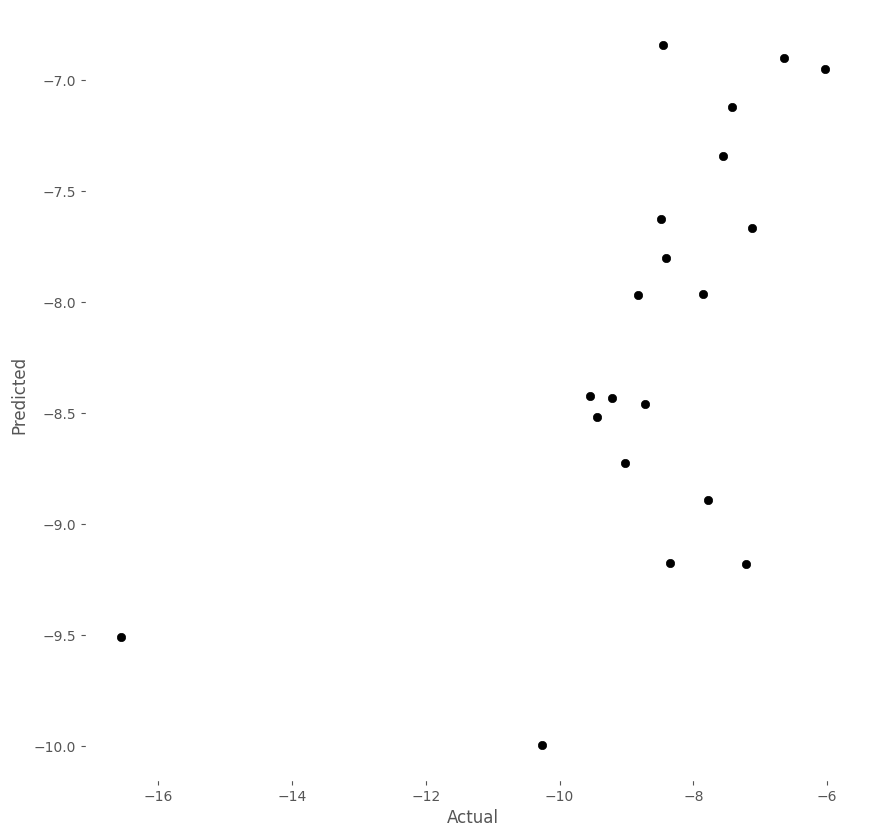

In [46]:
%matplotlib inline
# Plot the predictions vs the actuals
# White background
plt.figure(figsize=(10, 10))
# Add white background
plt.gca().set_facecolor("white")
plt.scatter(actuals, predictions, color='black')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


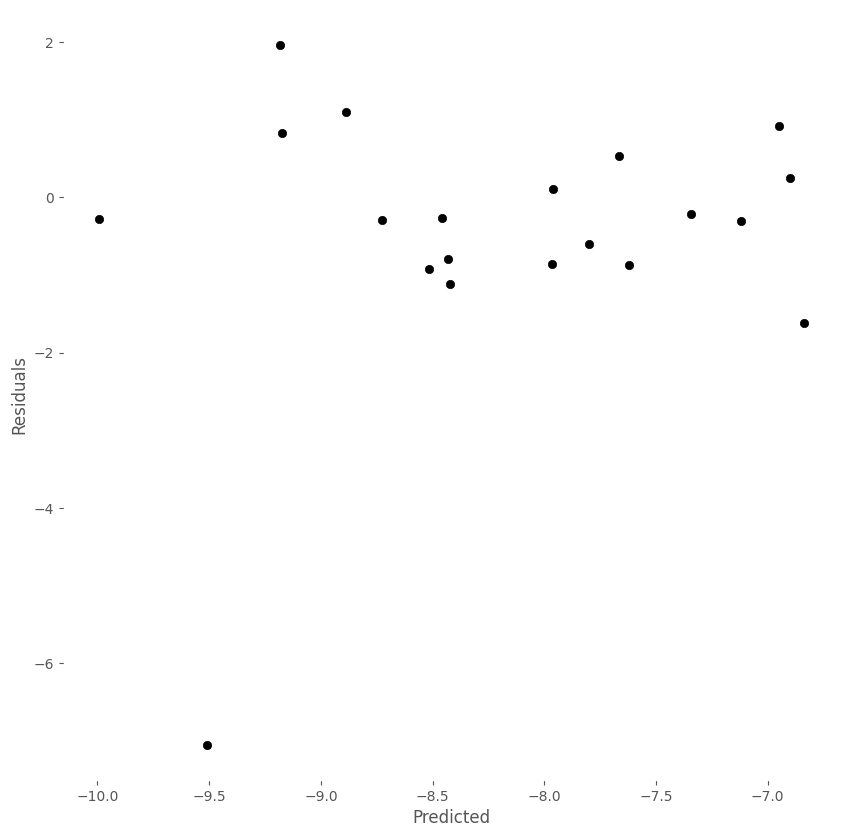

In [47]:
# Plot the residuals
plt.figure(figsize=(10, 10))
plt.gca().set_facecolor("white")
plt.scatter(predictions, actuals - predictions, color='black')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()